# Index
- 1
- 2
- 3
- 4
- 5


In [43]:
import scipy.interpolate as interpol
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# load single variant data and add features to it

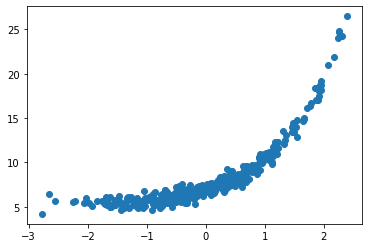

In [26]:
data=np.load("./Downloads/Data.npy")
x=data[:,0].reshape(-1,1)
y=data[:,1]

#plot original data
plt.scatter(x,y)
plt.show() #data is non linearly seperable

In [28]:
def add_features(degree,x):
    poly=PolynomialFeatures(degree) #add features to data
    x1=poly.fit_transform(x)
    return x1

In [4]:
def split_data(xp,y): #split data into training and testing
    x_train,x_test,y_train,y_test=train_test_split(xp,y,test_size=0.3)
    return x_train,x_test,y_train,y_test

In [5]:
def fit_data(xtrain,ytrain): #fit data and report its error rate
    model=LinearRegression()
    fitted=model.fit(xtrain,ytrain)
    score=model.score(xtrain,ytrain)
    print("model score=",score)
    return model
    
    
    

In [6]:
def error_rate(ytrue,ypredict): #compute error rate between true labels and predicted labels
    error=mean_squared_error(ytrue,ypredict)
    return error
    
    

In [7]:
def predict(xtrain,xtest,model): #function to predict labels in training and testing
    train_predicted=model.predict(xtrain)
    test_predicted=model.predict(xtest)
    return train_predicted,test_predicted

In [36]:
def poly_regression(x,y,degree): #polynomial regression function
    
    poly_data,polyReg=add_features(degree,x) 
    print("new data shape",poly_data.shape)
    
    x_train,x_test,y_train,y_test=split_data(poly_data,y)
    
    model=fit_data(x_train,y_train)
    yPredicted_train,ypredicted_test=predict(x_train,x_test,model)
    
    errortrain=error_rate(y_train,yPredicted_train)
    errorTest=error_rate(y_test,ypredicted_test)
    
    training_r2score=r2_score(y_train,yPredicted_train)
    testing_r2score=r2_score(y_test,ypredicted_test)
    
    print(f"Training error={errortrain}, testing error={errorTest}")
    print(f"Training r2_score={training_r2score}, testing r2_score={testing_r2score}")
    
    predictpoly=model.predict(poly_data) #predict 
    plot_reg_line(x,y,predictpoly,degree)
    

In [52]:
def plot_reg_line(x,y,y_poly,d): #plot regression curve 
    plt.scatter(x,y,c='red')
    plt.plot(x,y_poly)
    plt.title("regression curve")
    plt.show()
      

# Call the implemted fn

new data shape (400, 1)
model score= 0.0
Training error=11.745390158027202, testing error=16.524316723553003
Training r2_score=0.0, testing r2_score=-0.0004981314436822704


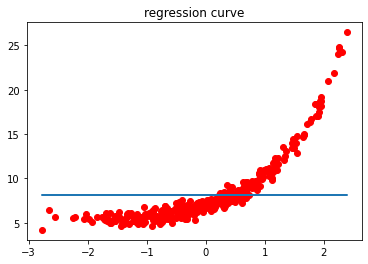

new data shape (400, 2)
model score= 0.6986882640735904
Training error=4.083989555379677, testing error=3.874601348175396
Training r2_score=0.6986882640735904, testing r2_score=0.6848724526074437


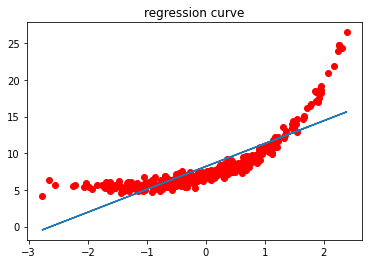

new data shape (400, 3)
model score= 0.9419167119460553
Training error=0.8331095537497859, testing error=0.7689500431484252
Training r2_score=0.9419167119460553, testing r2_score=0.9252400519040376


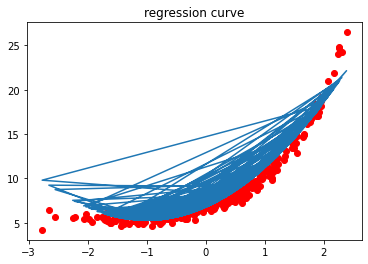

new data shape (400, 4)
model score= 0.9820269620410981
Training error=0.2780699785497102, testing error=0.4149985413724491
Training r2_score=0.9820269620410981, testing r2_score=0.9428612663260465


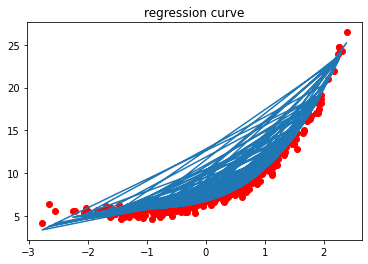

new data shape (400, 5)
model score= 0.9785077612834211
Training error=0.25127899105873436, testing error=0.2684928835067691
Training r2_score=0.9785077612834211, testing r2_score=0.9837202545166099


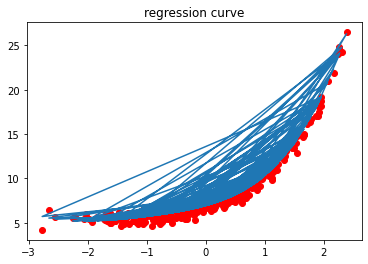

In [53]:
#try different degrees
for i in range(0,5):
    poly_regression(x,y,i)